In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data1 = pd.read_csv('../climate_data/merged_weekly_avg_temp.csv')




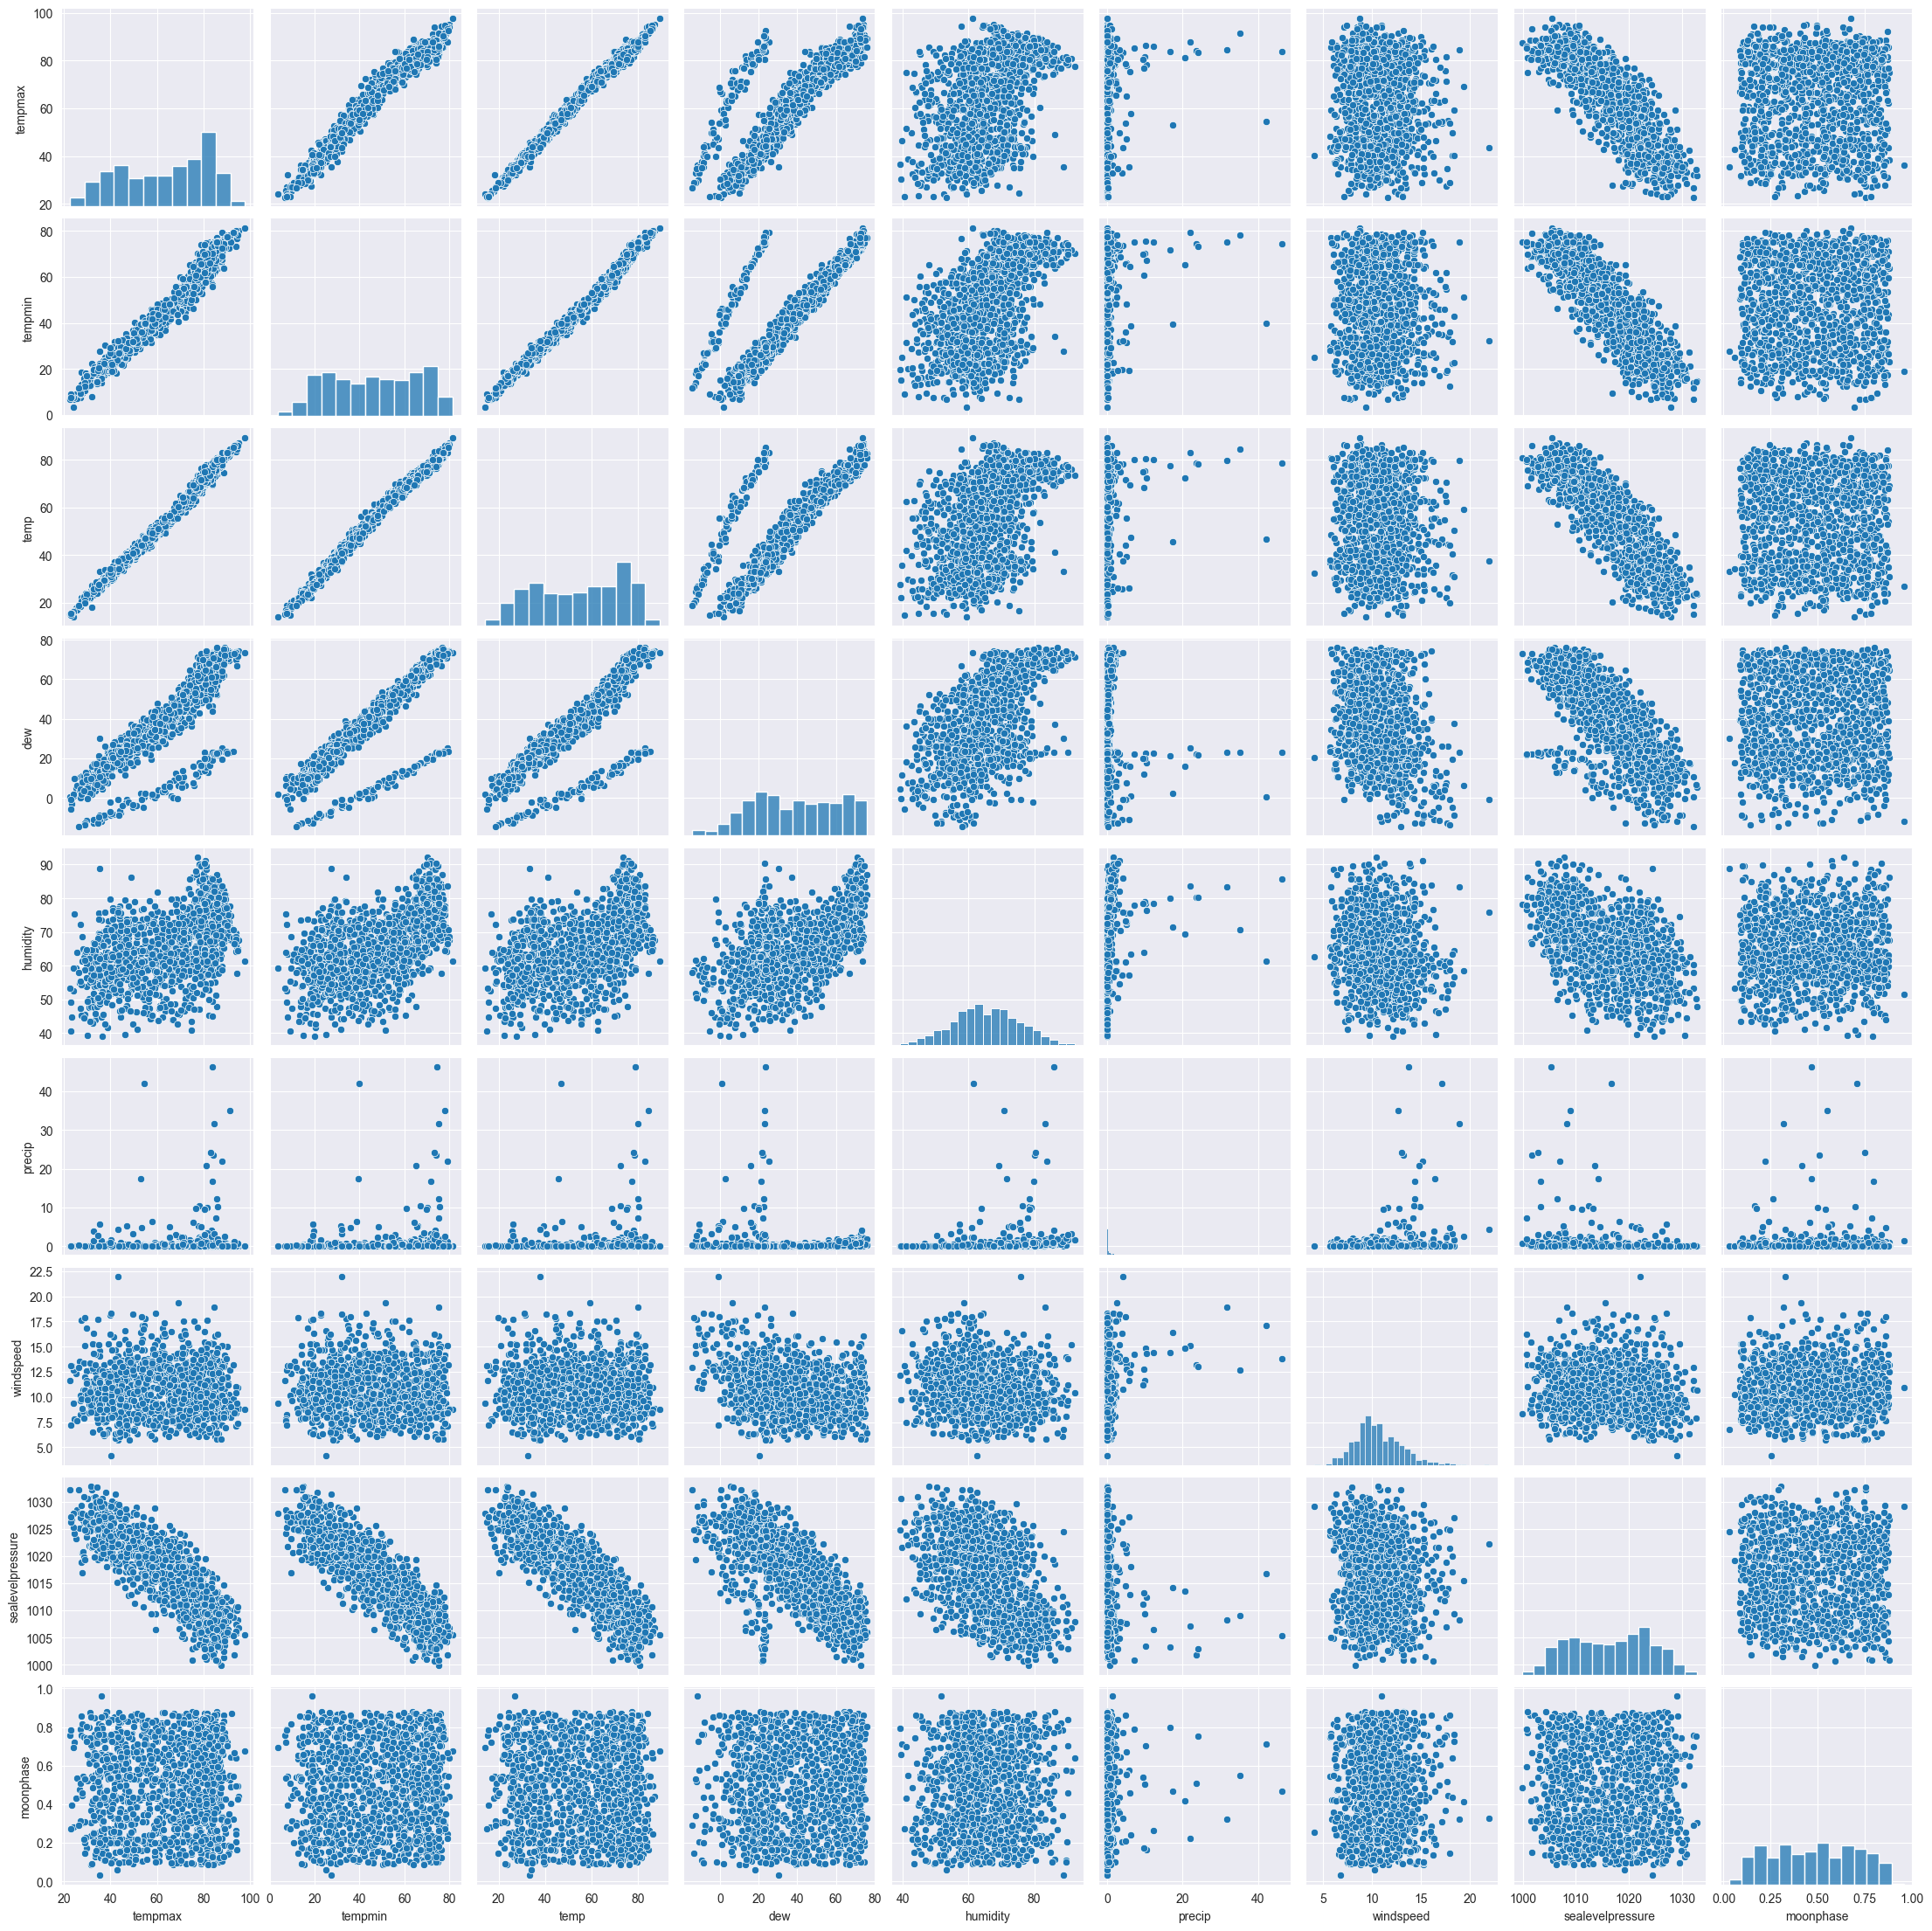

In [3]:
# Seaborn을 활용하여 각 속성간의 상관관계 분석하기

sns.pairplot(data = data1, vars=['tempmax','tempmin','temp','dew','humidity','precip','windspeed','sealevelpressure','moonphase'], kind = 'scatter', dropna=True)

In [4]:
####################################################################
# [주의!!!!] 
# class 속성에 라벨을 추가하는 코드입니다.
# 실행 X
data1['class'] = 0
for index, row in data1.iterrows():
    # 섭씨 30도가 넘어가는 경우 : 폭염으로 판단
    if row['tempmax'] > 73:
        data1.at[index, 'class'] = 1
    # 섭씨 영하 10도보다 작은 경우 : 한파로 판단
    if row['tempmin'] < 20:
        data1.at[index, 'class'] = 1

output_file_path = "../climate_data/labeled_climate.csv"
data1.to_csv(output_file_path, index=False)
print("New CSV file 'labeled_climate.csv' has been created with the 'class' column.")
####################################################################


New CSV file 'labeled_climate.csv' has been created with the 'class' column.


In [5]:
!pip install scikit-learn

In [6]:
from sklearn.model_selection import train_test_split

# 데이터 불러오기
data2 = pd.read_csv('../climate_data/labeled_climate.csv')

# 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(data2[['moonphase']], data2['class'], test_size=0.2, shuffle=True)

print("The Dimension of the trainset is ", X_train.shape)
print("The Dimension of the testset is ", X_test.shape)

The Dimension of the trainset is  (1011, 1)
The Dimension of the testset is  (253, 1)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(tol=1e-04).fit(X_train_scaled, y_train)

In [9]:
print("--------------------------------------------")
print("regression coefficients: ", model1.coef_)
print("intercept is ", model1.intercept_)
print("model score is ", model1.score(X_train_scaled, y_train))
print("--------------------------------------------")

--------------------------------------------
regression coefficients:  [[0.04207853]]
intercept is  [0.02177008]
model score is  0.5143422354104846
--------------------------------------------


In [10]:
model1.predict_proba(X_test_scaled)

array([[0.49316352, 0.50683648],
       [0.4953742 , 0.5046258 ],
       [0.49256065, 0.50743935],
       [0.50187297, 0.49812703],
       [0.47783483, 0.52216517],
       [0.48117915, 0.51882085],
       [0.48198204, 0.51801796],
       [0.47903857, 0.52096143],
       [0.47629709, 0.52370291],
       [0.47763423, 0.52236577],
       [0.49061823, 0.50938177],
       [0.49932702, 0.50067298],
       [0.4938334 , 0.5061666 ],
       [0.49209177, 0.50790823],
       [0.49972901, 0.50027099],
       [0.47830292, 0.52169708],
       [0.48639954, 0.51360046],
       [0.50910788, 0.49089212],
       [0.48164749, 0.51835251],
       [0.48767166, 0.51232834],
       [0.49704908, 0.50295092],
       [0.49021638, 0.50978362],
       [0.49698208, 0.50301792],
       [0.49369942, 0.50630058],
       [0.48747079, 0.51252921],
       [0.48459208, 0.51540792],
       [0.47709933, 0.52290067],
       [0.48030945, 0.51969055],
       [0.48305272, 0.51694728],
       [0.50381588, 0.49618412],
       [0.

In [11]:
y_pred = model1.predict(X_test_scaled)
print("predicted class are ", y_pred)

predicted class are  [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1
 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [12]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[44 83]
 [40 86]]


In [13]:
print(metrics.classification_report(y_test, y_pred, target_names=['class1', 'class2']))

              precision    recall  f1-score   support

      class1       0.52      0.35      0.42       127
      class2       0.51      0.68      0.58       126

    accuracy                           0.51       253
   macro avg       0.52      0.51      0.50       253
weighted avg       0.52      0.51      0.50       253

